# Описание проекта #

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План работы ##

- **изучение общей информации**
- **подготовка данных**
- **исследовательский анализ данных**
- **портрет пользователя каждого региона**
- **проверка гипотез**
- **общий вывод**

## Описательные данные ##
    • Name — название игры
    • Platform — платформа
    • Year_of_Release — год выпуска
    • Genre — жанр игры
    • NA_sales — продажи в Северной Америке (миллионы проданных копий)
    • EU_sales — продажи в Европе (миллионы проданных копий)
    • JP_sales — продажи в Японии (миллионы проданных копий)
    • Other_sales — продажи в других странах (миллионы проданных копий)
    • Critic_Score — оценка критиков (максимум 100)
    • User_Score — оценка пользователей (максимум 10)
    • Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

# Изучение обещей информации #

## Ипорт библиотек ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

## Изучение таблиц ##

In [2]:
#посмотрим первые и последние строки таблицы
#затем оценим имеющуюся информацию о нез

df = pd.read_csv('\Сборный Проект №1 (2)\games.csv')

display(df.head())
display(df.tail())
df.info()
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Вывод ##

Сразу же бросаются в глаза не совсем корректные названия столбцов. Также видно, что столбцы с оценкой критиков и пользователей необходимо перевести в другой формат. В некоторых столбцах имеются пропущенные значения, проведем оценку и обработаем пропуски. В таблице с описанием на первый взгляд значения смотрятся вполне реально, однако там нехватает некоторых столбцов.

План предобработки данных:

- привести столбцы к првильному регистру;
- добавим недостающие столбцы;
- преобразование типов данных;
- обработать пропуски.

# Предобработка данных #

## Приведение к правильному регистру ##

In [3]:
#приведем названия столбцов к правильному регистру

df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 
                        'Year_of_Release': 'year_of_release', 
                        'Genre': 'genre', 'Other_sales': 'other_sales', 
                        'Critic_Score': 'critic_score', 
                        'User_Score': 'user_score','Rating': 'rating'})

## Добавим недостабщие столбцы ##

In [4]:
#добавим столбец с суммарными продажами и проверим результат

df['world_sales'] = df.filter(like='sales').sum(axis=1)
df.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Обработка пропусков и преобразование типов данных ##

Пропуски в столбце с названием игр можно оставить, так как конкренто названия особую роль не играют, а вот для дальнейшей работы они нам подойдут. Учитывая, что наш анализ будет строиться на группировке по годам для построения прогноза на 2017 год, то строки с пропусками года выпуска мы удалим (их процент небольшой и на общую картину он не повлияет). Что касается пропусков в рейтинге игр, то мы их оставим, так как они составляют большую часть таблицы.

Данные пропуски значений могли возникнуть скорее всего из-за технических сбоев при составлени таблицы, потому что такие данные должны быть в открытом доступе. Что касается оценки игр, то здесь также может иметь место фактор определенной границы по количеству голосов, чтобы оценка была основана не на игре одного пользователя.

In [6]:
#удалим строки, в которых пропущенны года издания игр и жанры с названиями

df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['genre'])

In [7]:
#преобразует типы данных

df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  world_sales      16444 non-null  float64
dtypes: float64(6), int32(1), object(5)
memory usage: 1.6+ MB


In [8]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце user_score мы видим очень много оценок tbd (в переводе на русский язык, "подлежит уточнению"). Заменим их на NaN, чтобы можно было производить операции с этим столбцом.

In [9]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  world_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [10]:
#посмотрим на пропуски в столбцах

df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
world_sales        0.000000
dtype: float64

In [11]:
#заполним пропуски в столбце rating

df['rating'] = df['rating'].fillna('no rating')
df.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


## Вывод ##

Мы заменили названия столбцов, обработали пропуски и привели данные к необходимым форматам. Теперь мы готовы приступать к анализу! 

# Исследовательский анализ данных #

## Структура исследовательского анализа ##

На данном этапе нам необходимо:
- посмотреть, сколько игр выпускалось в разные годы;
- посмотреть, как менялись продажи по платформам;
- выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
- выбрать несколько потенциально прибыльных платформ;
- посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
- построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
- сформулировать выводы.

## Количество выпущенных игр в год ##

<AxesSubplot:title={'center':'Количество выпущенных игр в год'}, xlabel='year_of_release', ylabel='Количество игр'>

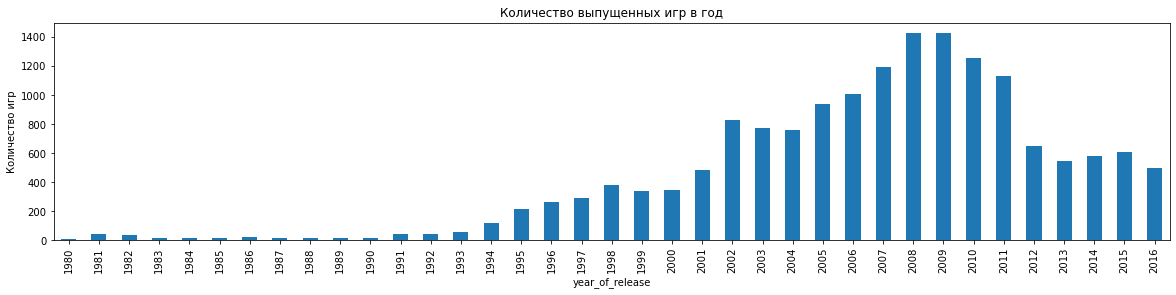

In [12]:
#сгруппируем ланные по годам выпуска

plt.title('Количество выпущенных игр в год')

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(20,4))

Отсортировав таблицу по количеству выпущенных игр в разные годы мы видим, что зависимости количества игр конкретно от года нет и также не прослеживается общей тенденции. Однако можно отметить, что в за опеределенные промежутки времени выпускается приблизительно одинаковое количество игр. Также можно предположить, что определенным фактором может служить выход (или же отсрочка выхода) консоли новго поколения. 

## Продажи по платформам ##

<AxesSubplot:title={'center':'Платформы с наибольшими суммарными продажами'}, xlabel='platform', ylabel='Суммарные продажи'>

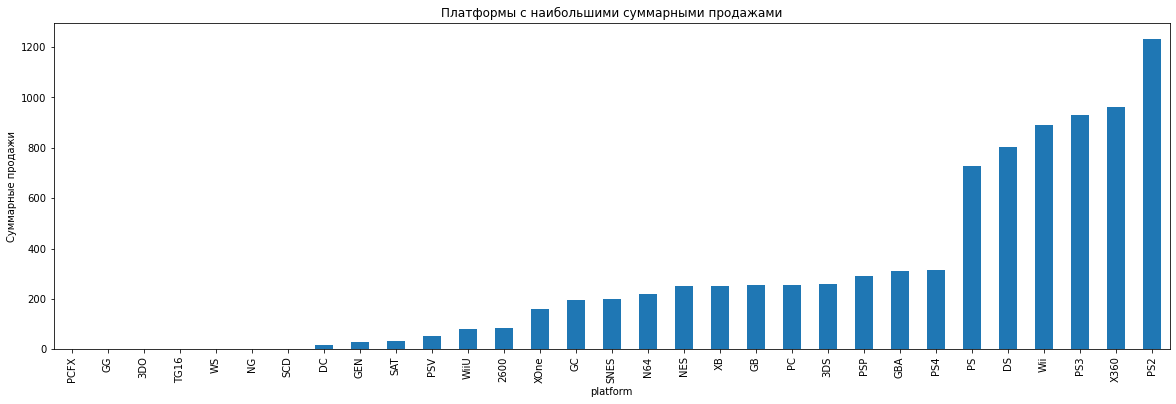

In [13]:
#найдем платформы с наибольшими суммарными продажами

plt.title('Платформы с наибольшими суммарными продажами')

plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')

df.groupby('platform')['world_sales'].sum().sort_values().plot.bar(figsize=(20,6))

В топ продаж попали платформы не самого последнего поколения. Посмотрим на графики распределения самых популярных платформ и выберем актуаьлный период. 

## Графики распределения самых популярных платформ ##

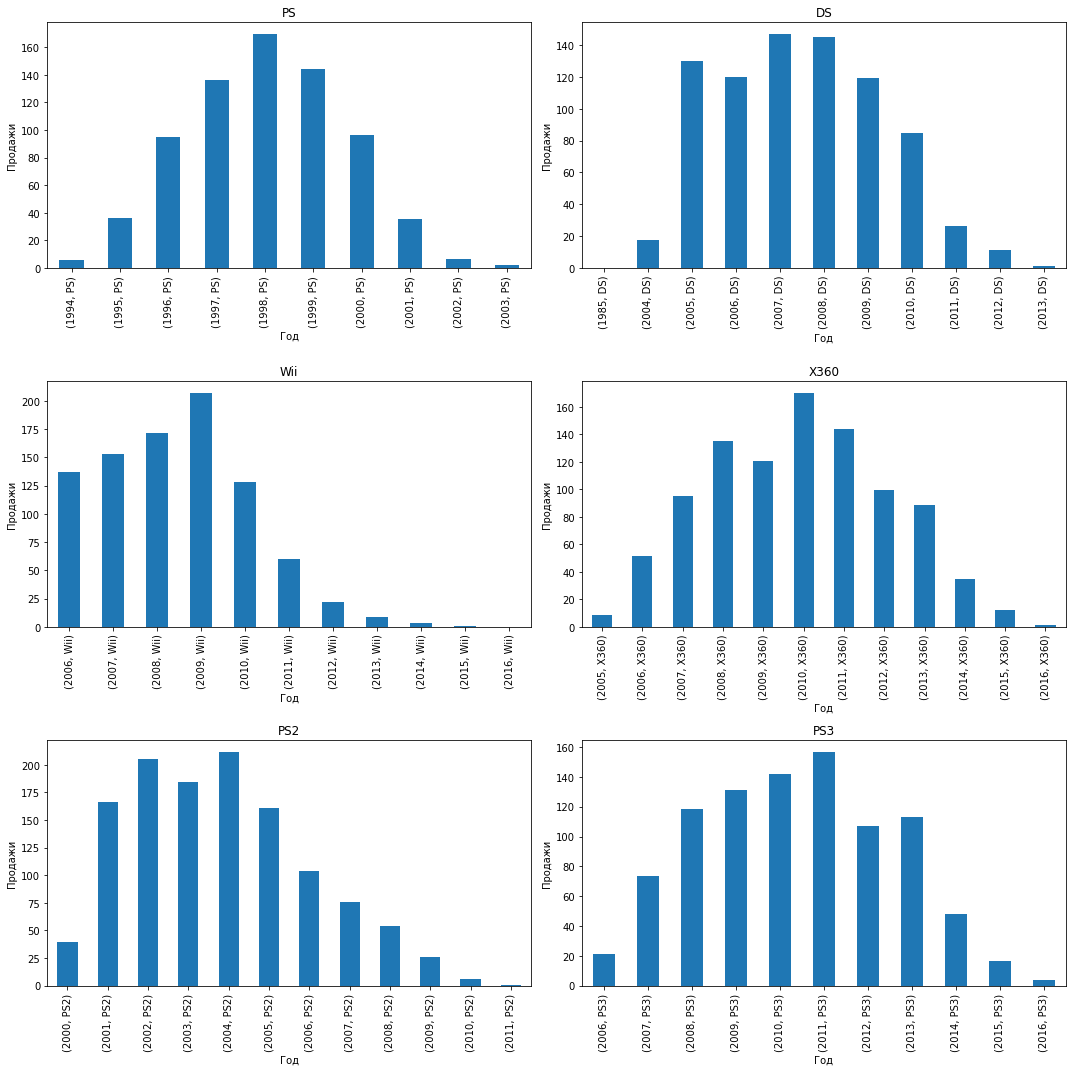

In [14]:
position = 1
platforms = ['PS', 'DS', 'Wii', 'X360', 'PS2', 'PS3']
plt.figure(figsize=(15, 15))
plt.tight_layout()

for pristavka in platforms:
    plt.subplot(3, 2, position)
    df.query('platform == @pristavka').groupby(['year_of_release', 'platform'])['world_sales'].sum().plot.bar()
    plt.title(pristavka)
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    position += 1
        
plt.tight_layout()    

### Промежуточный вывод ###

На графиках видно, что платформы существуют от 10 до 12 лет, а пик продаж приходится в основном на 3-6 года с момента релиза консоли. Также, учитывая, что платформы нового поколения различных фирм выходят одновременно, можно проследить закономерность продаж от выхода по конслои PS.

Первая консоль PS вышла в 1994 году, и пик игровых продаж приходится на 1997-1999 года. В 2000 году выходит PS2, в результате чего уже в этом году продажи игр на PS падают, а PS2 соответственно растут. Аналогичная ситуация происходит и со следующей весией продукта: в год выхода PS3 (2006).

Мы знаем, что PS4 вышла в конце 2013 года. На графике PS3 прослеживается соотвествующее падение продаж, начиная с 2014. Можно предположить, что следющие несколько лет станут пиками по продажам игр на PS4 и соотвественно на платформах 8-го поколения. Однако окончательный вывод сделаем после проверки всех данных.

## Обновленная статистика ##

Изучив статистику выхода консолей, мы возьмем данные за последние 4 года - вторую половину предположительного периода "плодотворной жизни" консоли одного поколения, - так как именно эти данные помогут нам построить прогноз на 2017 год.

In [15]:
#создадим таблицу с актуальными данными (за последние семь лет) и
#посчитаем суммарные продажи на различных платформах

df_newest = df.query('year_of_release >= 2013')
df_newest.groupby('platform')['world_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: world_sales, dtype: float64

Мы можем сделать вывод, что платформами с наибольишими суммарными продажами являются PS3 и X360. Также прослеживатся закономерность, что с выходом новой консоли (в нашем случае PS4 и XOne) продажи на старых версиях будут постепенно падать, а на новых - наоборот расти.

Построим дополнительные графики, чтобы посмотреть, как ведут себя и сколько "прожили" топ-5 платформ за последние 7 лет.

## Актуальные продажи платформ ##

<AxesSubplot:xlabel='platform'>

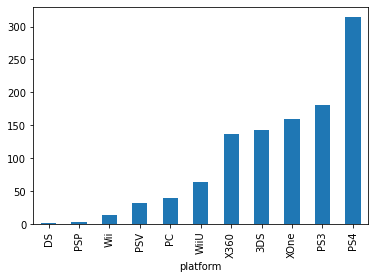

In [16]:
#выберем платформы с наибольшим количеством продаж за последнее время

df_newest.groupby('platform')['world_sales'].sum().sort_values().plot.bar()

В лидерах по продажам находятся PS4, PS3, XOne, 3DS и X360. Построим графики продаж для этих платформ. 

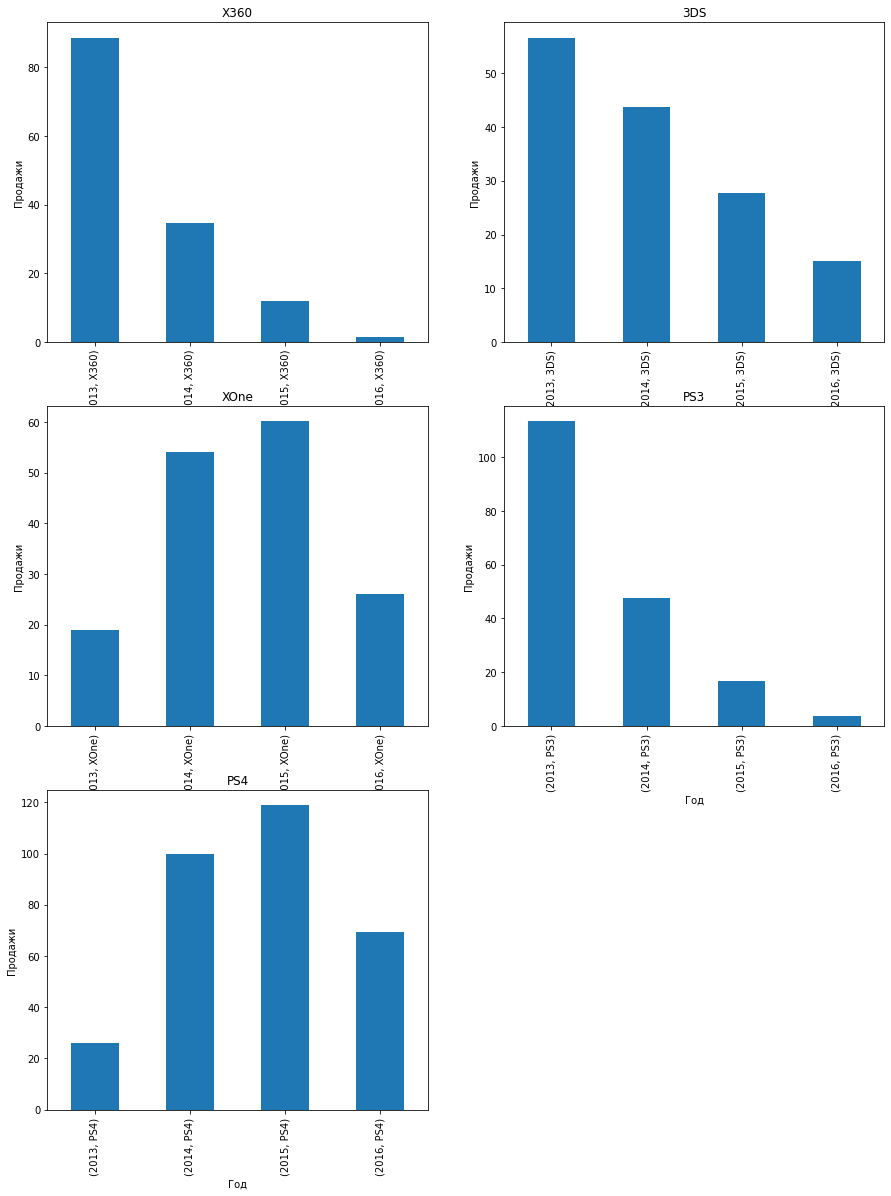

In [17]:
#построим графики остальных моделей, попавших в наш список

position = 1
platforms = ['X360', '3DS', 'XOne', 'PS3', 'PS4']
plt.figure(figsize=(15, 20))

for pristavka in platforms:
    plt.subplot(3, 2, position)
    df_newest.query('platform == @pristavka').groupby(['year_of_release', 'platform'])['world_sales'].sum().plot.bar()
    plt.title(pristavka)
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    position += 1

На графиках мы видим динамику продаж самых популярных платформ. У PS3, 3DS и X360 эта динамика нисходящая, следовательно, на эти платформы рассчитывать не стоит.

С другой стороны, мы видим положительную динамику на платформах PS4 и XOne. Поэтому остановимся именно на них!

## "Ящик с усами" преположительных лидеров ##

Text(0, 0.5, 'Продажи')

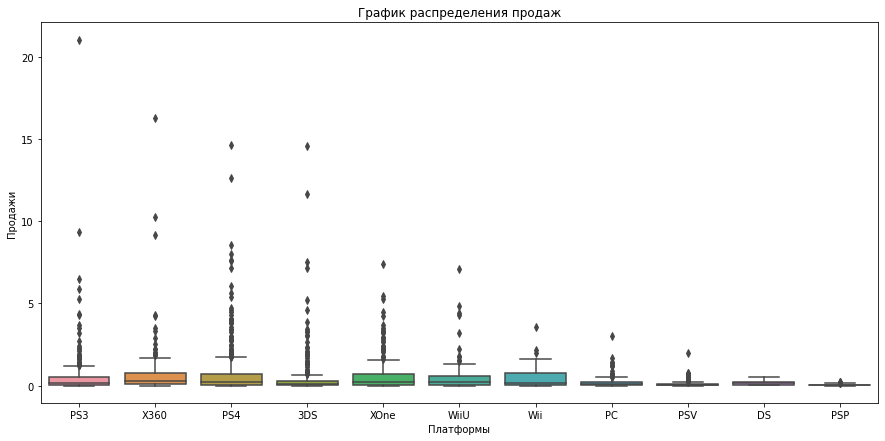

In [18]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по отобранным нами двум платформам.
plt.figure(figsize=(15, 7))

sns.boxplot(x = 'platform',  y = 'world_sales', data = df_newest)

plt.title('График распределения продаж')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

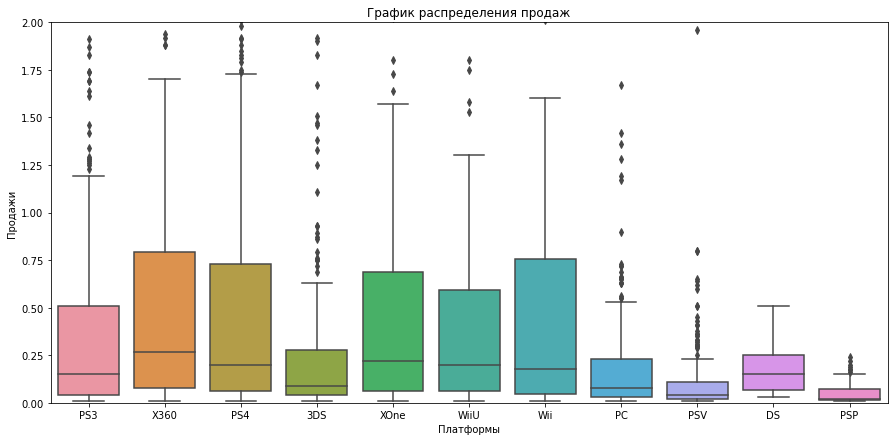

In [19]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по отобранным нами двум платформам.
plt.figure(figsize=(15, 7))

sns.boxplot(x = 'platform',  y = 'world_sales', data = df_newest)

plt.title('График распределения продаж')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim([0, 2]);

По графикам видно, что в продажах очень много значений, которые являются выбросами. Однако в нашем случае это означает, что имеется большое количество дорогих продаж.

## Зависимость продаж от отзывов ##

Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

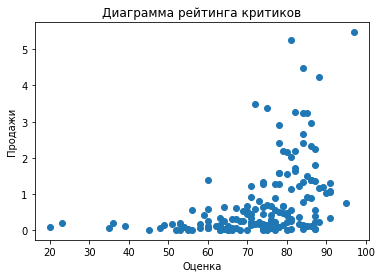

Text(0, 0.5, 'Продажи')

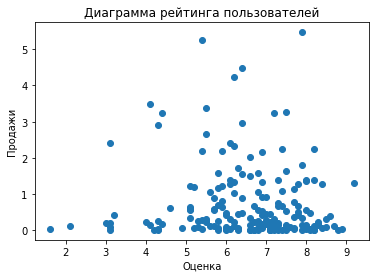

In [20]:
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

df_xone = df_newest.query('platform == "XOne"')
plt.scatter(x=df_xone['critic_score'], y=df_xone['world_sales'])
plt.title('Диаграмма рейтинга критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.show()

plt.scatter(x=df_xone['user_score'], y=df_xone['world_sales'])
plt.title('Диаграмма рейтинга пользователей')
plt.xlabel('Оценка')
plt.ylabel('Продажи')

In [21]:

df_xone[['critic_score', 'user_score']].corrwith(df_xone['world_sales'])

critic_score    0.416998
user_score     -0.068925
dtype: float64

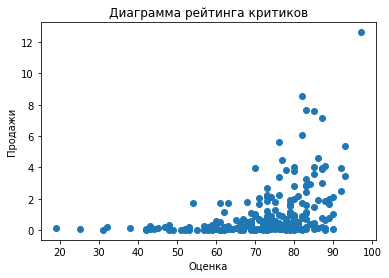

Text(0, 0.5, 'Продажи')

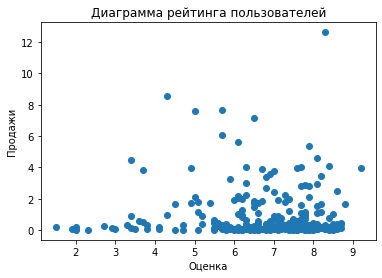

In [22]:
df_ps = df_newest.query('platform == "PS4"')
plt.scatter(x=df_ps['critic_score'], y=df_ps['world_sales'])
plt.title('Диаграмма рейтинга критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.show()

plt.scatter(x=df_ps['user_score'], y=df_ps['world_sales'])
plt.title('Диаграмма рейтинга пользователей')
plt.xlabel('Оценка')
plt.ylabel('Продажи')

In [23]:
df_ps[['critic_score', 'user_score']].corrwith(df_ps['world_sales'])

critic_score    0.406568
user_score     -0.031957
dtype: float64

<AxesSubplot:>

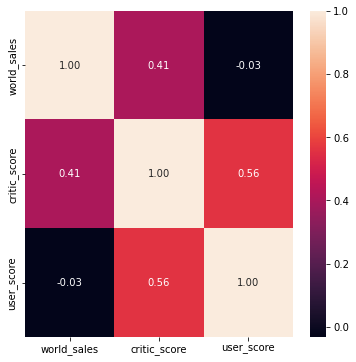

In [24]:
plt.figure(figsize=(6,6))
sns.heatmap(df_newest[df_newest['platform'] == 'PS4'][['world_sales', 'critic_score', 'user_score']].corr(), annot=True, fmt='.2f')  

На даиграммах видно, что есть небольшая прямая взаимосвязь между отзывами критиков и продажами, чего не скажешь о связи оценок пользовалей с продажами.

## Сравнение по общим показателям ##

Сравним выводы по отобранным нами платформам с общей статистикой.

In [25]:
#создадим список уникальных платформ

platforms = df_newest['platform'].unique()

#напишем цикл, для определения корреляции по каждой платформе

for platform in platforms:
    correlation = df_newest.query('platform == @platform')
    print(platform,'коэффициент корреляции:',correlation['critic_score'].corr(correlation['world_sales']))

PS3 коэффициент корреляции: 0.3342853393371919
X360 коэффициент корреляции: 0.3503445460228664
PS4 коэффициент корреляции: 0.40656790206178095
3DS коэффициент корреляции: 0.3570566142288103
XOne коэффициент корреляции: 0.4169983280084017
WiiU коэффициент корреляции: 0.3764149065423912
Wii коэффициент корреляции: nan
PC коэффициент корреляции: 0.19603028294369382
PSV коэффициент корреляции: 0.2547423503068656
DS коэффициент корреляции: nan
PSP коэффициент корреляции: nan


C:\Users\Vlados\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Vlados\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
for platform in platforms:
    correlation = df_newest.query('platform == @platform')
    print(platform,'коэффициент корреляции:',correlation['user_score'].corr(correlation['world_sales']))

PS3 коэффициент корреляции: 0.0023944027357566925
X360 коэффициент корреляции: -0.011742185147181342
PS4 коэффициент корреляции: -0.031957110204556424
3DS коэффициент корреляции: 0.24150411773563016
XOne коэффициент корреляции: -0.06892505328279414
WiiU коэффициент корреляции: 0.4193304819266187
Wii коэффициент корреляции: 0.6829417215362368
PC коэффициент корреляции: -0.0938418695247674
PSV коэффициент корреляции: 0.0009424723319108626
DS коэффициент корреляции: nan
PSP коэффициент корреляции: -0.9999999999999999


### Вывод ###

На большинстве платформ наблюдается незначительная корреляция между оценкой критиков и продажами, а также отсутствие взаимосвязи между оценкой пользователей и продажами.

## Зависимость продаж от жанров ##

Text(0, 0.5, 'Продажи')

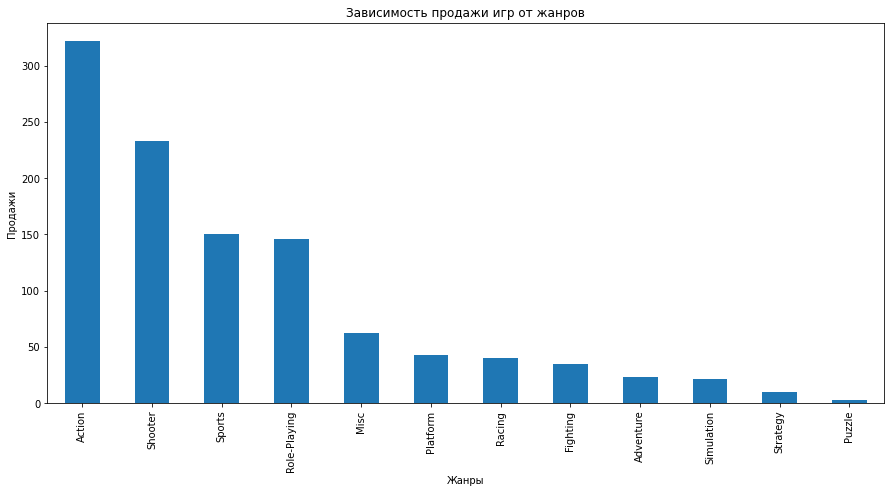

In [27]:
#посмотрим, зависят ли продажи игр от жанров

plt.figure(figsize=(15, 7))

df_newest.groupby(['genre'])['world_sales'].sum().sort_values(ascending=False).plot.bar()
plt.title('Зависимость продажи игр от жанров')
plt.xlabel('Жанры')
plt.ylabel('Продажи')

Да, взаимосвязь жанра с объемом продаж есть. Самыми популярными жанрами являются экшны и шутеры. Последние места занимают паззлы и стратегии.

## Вывод ##

В результате исследовательского анализа мы определили актуальный период (2010-2016гг), а также продолжительность жизни платформ (10-12 лет).

Платформами с наибольишими суммарными продажами являются PS3 и X360, однако их продажи прошли пиковые показатели и стремятся к нулю. Также прослеживатся закономерность, что продажи PS4 и XOne будут постепенно расти.

Что касается зависимости продаж от отзывов, то такая закономерность слабо прослеживается только в отношении отзывов критиков.

Также мы о пределили зависимость продаж от жанров.

# Портрет пользователя каждого региона #

## Структура формирования портрета пользователя региона ##

Определим для пользователя каждого региона:

    • определение самых популярных платформ (топ-5);
    • определение самых популярных жанров (топ-5);
    • влияние рейтинга ESRB на продажи в отдельном регионе.

## Самые популярные платформы ##

In [28]:
#посмотрим на самые популярные платформы в каждом из регионов

df_newest_NA = df_newest.pivot_table(index='platform', values='NA_sales', aggfunc='sum')
df_newest_NA_total = df_newest_NA['NA_sales'].sum()
df_newest_NA['share_of_sales'] = df_newest_NA['NA_sales'] / df_newest_NA_total
df_newest_NA['share_of_sales'].sort_values(ascending=False)

platform
PS4     0.248429
XOne    0.212744
X360    0.186562
PS3     0.145073
3DS     0.087272
WiiU    0.066734
PC      0.025382
Wii     0.014987
PSV     0.011514
DS      0.001302
PSP     0.000000
Name: share_of_sales, dtype: float64

In [29]:
df_newest_EU = df_newest.pivot_table(index='platform', values='EU_sales', aggfunc='sum')
df_newest_EU_total = df_newest_EU['EU_sales'].sum()
df_newest_EU['share_of_sales'] = df_newest_EU['EU_sales'] / df_newest_EU_total
df_newest_EU['share_of_sales'].sort_values(ascending=False)

platform
PS4     0.359712
PS3     0.172883
XOne    0.131530
X360    0.108406
3DS     0.078933
PC      0.064656
WiiU    0.050608
PSV     0.015552
Wii     0.015119
DS      0.002167
PSP     0.000433
Name: share_of_sales, dtype: float64

In [30]:
df_newest_JP = df_newest.pivot_table(index='platform', values='JP_sales', aggfunc='sum')
df_newest_JP_total = df_newest_JP['JP_sales'].sum()
df_newest_JP['share_of_sales'] = df_newest_JP['JP_sales'] / df_newest_JP_total
df_newest_JP['share_of_sales'].sort_values(ascending=False)

platform
3DS     0.481674
PS3     0.165862
PSV     0.132050
PS4     0.113368
WiiU    0.077284
PSP     0.023370
X360    0.003623
XOne    0.002415
Wii     0.000355
DS      0.000000
PC      0.000000
Name: share_of_sales, dtype: float64

### Вывод ###

Основными платформами в Северной Америке X360, PS3, Wii, PS4 и XOne. В Европе же раскалад немного другой, там больше предпочитают производителя Sony и игры на PC: PS3, X360, PS4, PC и Wii. Картина с Японией достаточно сильно отличается ввиду определенного притяжения к портативным приставкам и отличия культуры и вкусов от Северной Америки и Европы, их топ-5 следующий: 3DS, ps3, psp, DS и PSV.

# Жанры и регионы #

<Figure size 1080x504 with 0 Axes>

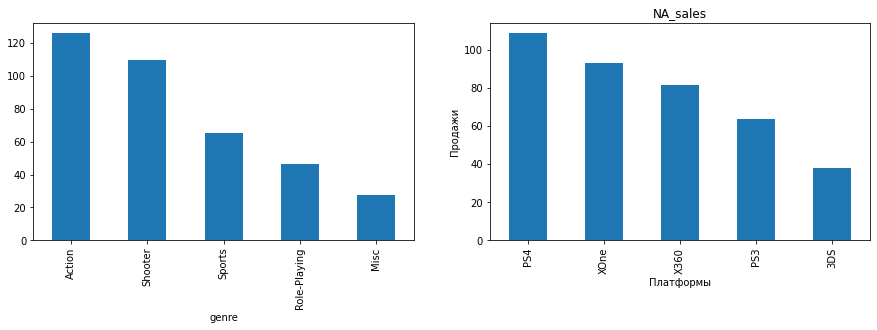

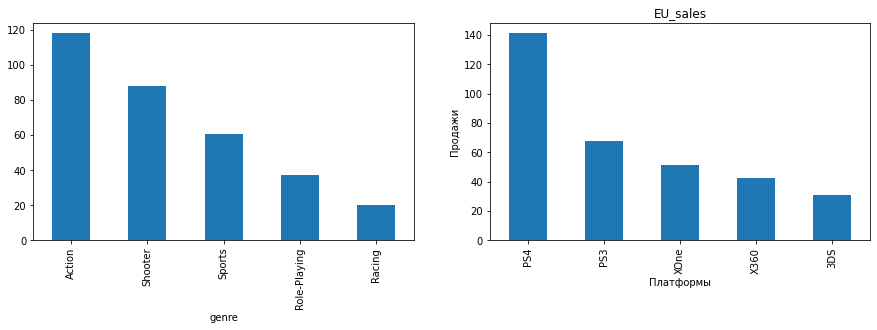

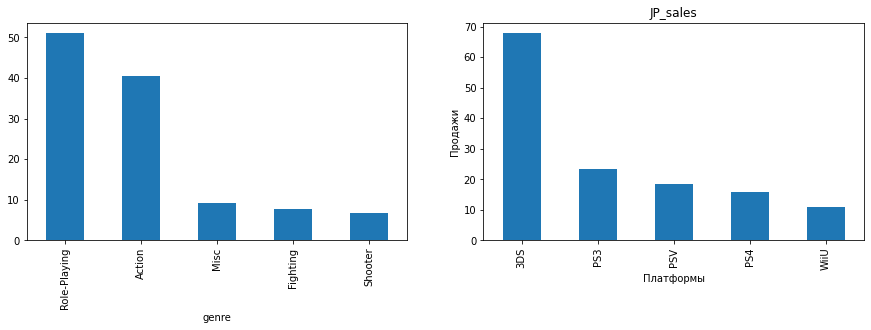

In [32]:
regions = ['NA_sales', 'EU_sales', 'JP_sales']
plt.figure(figsize=(15, 7))

for region in regions:
    #position = 0
    fig, axes = plt.subplots(1,2,figsize=(15,4))
    df_newest.groupby('genre')[region].sum().sort_values(ascending=False)[0:5].plot.bar(ax=axes[0])
    plt.title(region)
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    #plt.show()
    
    #position += 1
    df_newest.groupby('platform')[region].sum().sort_values(ascending=False)[0:5].plot.bar(ax=axes[1])
    plt.title(region)
    plt.xlabel('Платформы')
    plt.ylabel('Продажи')
    plt.show()

### Вывод ###

Топ-5 жанров в Европе и Северной Америке схожи: там в основном играют в экшн, шутеры, споритвные симуляторы, ролевые или миск. Как ни странно, топ-5 жанров, предпочитаемых в Японии, отличается. Он состоит из ролевых, экшна, миска, платформенных и приключенеских игр. Такое различие в предпочтениях можно объяснить разностью культур и предпочтений. Северная Америка и Европа похожи в этом плане между собой, чего не скажешь о Японии.   

## Влияние рейтинга ESRB ##

<AxesSubplot:xlabel='rating'>

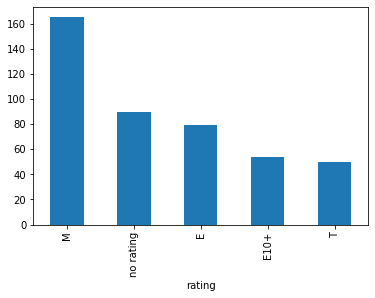

In [33]:
#сравним рейтинг ESRB

df_newest.groupby('rating')['NA_sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

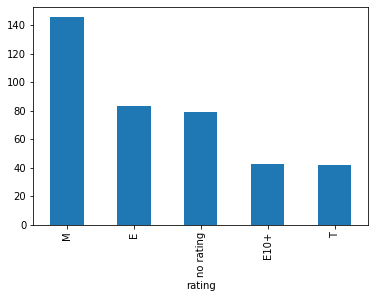

In [34]:
df_newest.groupby('rating')['EU_sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

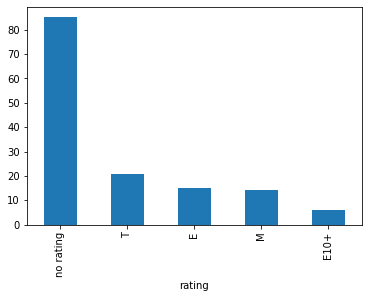

In [35]:
df_newest.groupby('rating')['JP_sales'].sum().sort_values(ascending=False).plot(kind='bar')

### Вывод ###

Аналогично прошлым показателям, рейтинги в Северной Америке и Европе схожи, и пользователи предпочитают игры 18+ или без ограничения по возрасу. В свою очередь, Япония отличается большим количеством игр, рейтинг которых не определен.  

## Общий вывод ##

- Основными платформами в Северной Америке X360, PS3, Wii, PS4 и XOne. В Европе же раскалад немного другой, там больше предпочитают производителя Sony и игры на PC: PS3, X360, PS4, PC и Wii. Картина с Японией достаточно сильно отличается ввиду определенного притяжения к портативным приставкам и отличия культуры и вкусов от Северной Америки и Европы, их топ-5 следующий: 3DS, ps3, psp, DS и PSV.
- Топ-5 жанров в Европе и Северной Америке схожи: там в основном играют в экшн, шутеры, споритвные симуляторы, ролевые или миск. Как ни странно, топ-5 жанров, предпочитаемых в Японии, отличается. Он состоит из ролевых, экшна, миска, платформенных и приключенеских игр. Такое различие в предпочтениях можно объяснить разностью культур и предпочтений. Северная Америка и Европа похожи в этом плане между собой, чего не скажешь о Японии.
- Аналогично прошлым показателям, рейтинги в Северной Америке и Европе схожи. В свою очередь, Япония отличается большим количеством игр без определенного рейтинга.

# Проверка гипотез #

## Выдвижение гипотез ##

Нам были поставлены задачи сравнить средние пользовательские рейтинги платформ Xbox One и PC, а также
средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).

Исходя из наших задач, выдвенем нулевые и альтернативные гипотезы (мы помним, что в нулевой гипотезе всегда должен быть знак "равно"):

    • средние пользовательские рейтинги платформ Xbox One и PC равны друг другу;
    • средние пользовательские рейтинги платформ Xbox One и PC не равны друг другу;

    • средние пользовательские рейтинги жанров Action и Sports равны;
    • средние пользовательские рейтинги жанров Action и Sports разные.

## Проверка первой гипотезы ##

In [36]:
#проверим первую гипотезу о равенстве пользовательского рейтинга платформ XOne и PC

alpha = 0.05

xone = df_newest[(df_newest['platform'] == 'XOne') & (df_newest['user_score'] > 0)]['user_score']
pc = df_newest[(df_newest['platform'] == 'PC') & (df_newest['user_score'] > 0)]['user_score']

print(xone.var(ddof=1))
print(pc.var(ddof=1))

1.9069968429360702
3.035892752408884


In [37]:
#мы используем функцию st.ttest_ind(), потому что сравниваем две средние значения,
#так как диперсии наших выборок различаются,
#то значение параметра equal_var укажем как False

results = st.ttest_ind(xone, pc, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


## Проверка второй гипотезы ##

In [38]:
#проведем аналогичную работу со вротой гипотезой

alpha = 0.05

action = df_newest[(df_newest['genre'] == 'Action') & (df_newest['user_score'] > 0)]['user_score']
sports = df_newest[(df_newest['genre'] == 'Sports') & (df_newest['user_score'] > 0)]['user_score']

print(action.var(ddof=1))
print(sports.var(ddof=1))

1.76936090424827
3.1806128144654062


In [39]:
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


## Вывод ##

Мы проверили две гипотезы, в результате чего можем сказать следующее:

- мы отвергаем гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC равны друг другу;
- также мы отвергаем гипотезу о равности средних пользовательских рейтингов жанров Action и Sports.

# Итоговый вывод #

Мы провели большую работу, в результате которой можем сформулировать логическое заключение.

Наше исследование относится к актуальному периоду (2010-2016гг). Платформами с наибольишими суммарными продажами являются PS3 и X360, однако они прошли пиковые показатели и стремятся к нулю. Также прослеживатся закономерность, что продажи PS4 и XOne будут расти в следующие годы, исходя из статистики "жизни платформы одного поколения".

Что касается зависимости продаж от отзывов, то такая закономерность слабо прослеживается только в отношении отзывов критиков.

Основными платформами в Северной Америке и Европе являются X360, PS3, Wii, PS4 и XOne. В Европе же раскалад немного другой, там больше предпочитают производителя Sony и игры на PC: PS3, X360, PS4, PC и Wii. Картина с Японией достаточно сильно отличается ввиду определенного притяжения к портативным приставкам и отличия культуры и вкусов от Северной Америки и Европы, их топ-5 следующий: 3DS, ps3, psp, DS и PSV. Исходя из данных о промежутках пиков-и-спадов продаж, актуальными платформами на 2017 год можно считать платформы 8-го поколения: 3DS (ориентируясь на Японию), PS4 и XOne. 

Топ-5 жанров в Европе и Северной Америке схожи: там в основном играют в экшн, шутеры, споритвные симуляторы, ролевые или миск. Как ни странно, топ-5 жанров, предпочитаемых в Японии, отличается. Он состоит из ролевых, экшна, миска, платформенных и приключенеских игр. Такое различие в также объясняется различием культур и предпочтений.

Рейтинг ESRB игр в Северной Америке и Европе схожи, и пользователи предпочитают игры 18+ или без ограничения по возрасу. В свою очередь, Япония отличается большим количеством игр, рейтинг которых не определен.

Мы проверили две гипотезы, в результате чего можем сказать, что:
- мы отвергаем гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC равны друг другу;
- однако не может отвергнуть гипотезу о равности средних пользовательских рейтингов жанров Action и Sports.

Определив закономерности успешности игры мы можем предположить, что потенциально популярными продуктами в 2017 году будут:

- экшен-игры и шутеры на платформах PS4 и XOne в Европе и Северной Америке с ограничениями 18+ или без них;
- в Японии следует сделать ставку на ролевые и экшен-игры на платформе 3DS.